In [27]:
import os

import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

/home/ildefonso/anaconda3/envs/tcn/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [26]:
TensorBoard?

In [5]:
MODELS = ('ED_TCN_25', 'CNN_biLSTM', 'Dilated_TCN_25_more_layers',)
model_names = ('convolutional\nencoder-decoder', 'CNN-biLSTM', 'dilated\nconvolutional')
model_colors = ('green', 'violet', 'orange')

#### bird 1
with 240, 480 seconds of training data and 300 time bins in spectrogram

In [88]:
root = '/media/ildefonso/HD-LCU3/compare-syl-seg/results_180422_105812/'

In [94]:
models = [
    'Dilated_TCN_25',
    #'Dilated_TCN_25_more_layers',
    'Dilated_TCN_100',
    'Dilated_TCN_100_more_layers',
    'Dilated_TCN_200',
    'Dilated_TCN_200_more_layers',
    'ED_TCN_25',
    'ED_TCN_100',
    'ED_TCN_200',
]
histories = {}
train_set_durs = [240, 480]
replicates = range(4)

In [105]:
for model in models:
    model_history_dict = {}
    for train_set_dur in train_set_durs:
        history = {}
        acc = []
        val_acc = []
        loss = []
        val_loss = []
        for replicate in replicates:
            curr_dir = (root + 
                        'records_for_training_set_with_duration_of_{}_sec_replicate_{}/'.format(train_set_dur, replicate))
            os.chdir(curr_dir)
            history = joblib.load(model + '_history')
            
            acc.append(history['acc'][:5])
            val_acc.append(history['val_acc'][:5])
            loss.append(history['loss'][:5])
            val_loss.append(history['val_loss'][:5])
        history['acc'] = np.asarray(acc)
        history['val_acc'] = np.asarray(val_acc)
        history['loss'] = np.asarray(loss)
        history['val_loss'] = np.asarray(val_loss)
        model_history_dict[train_set_dur] = history
    histories[model] = model_history_dict

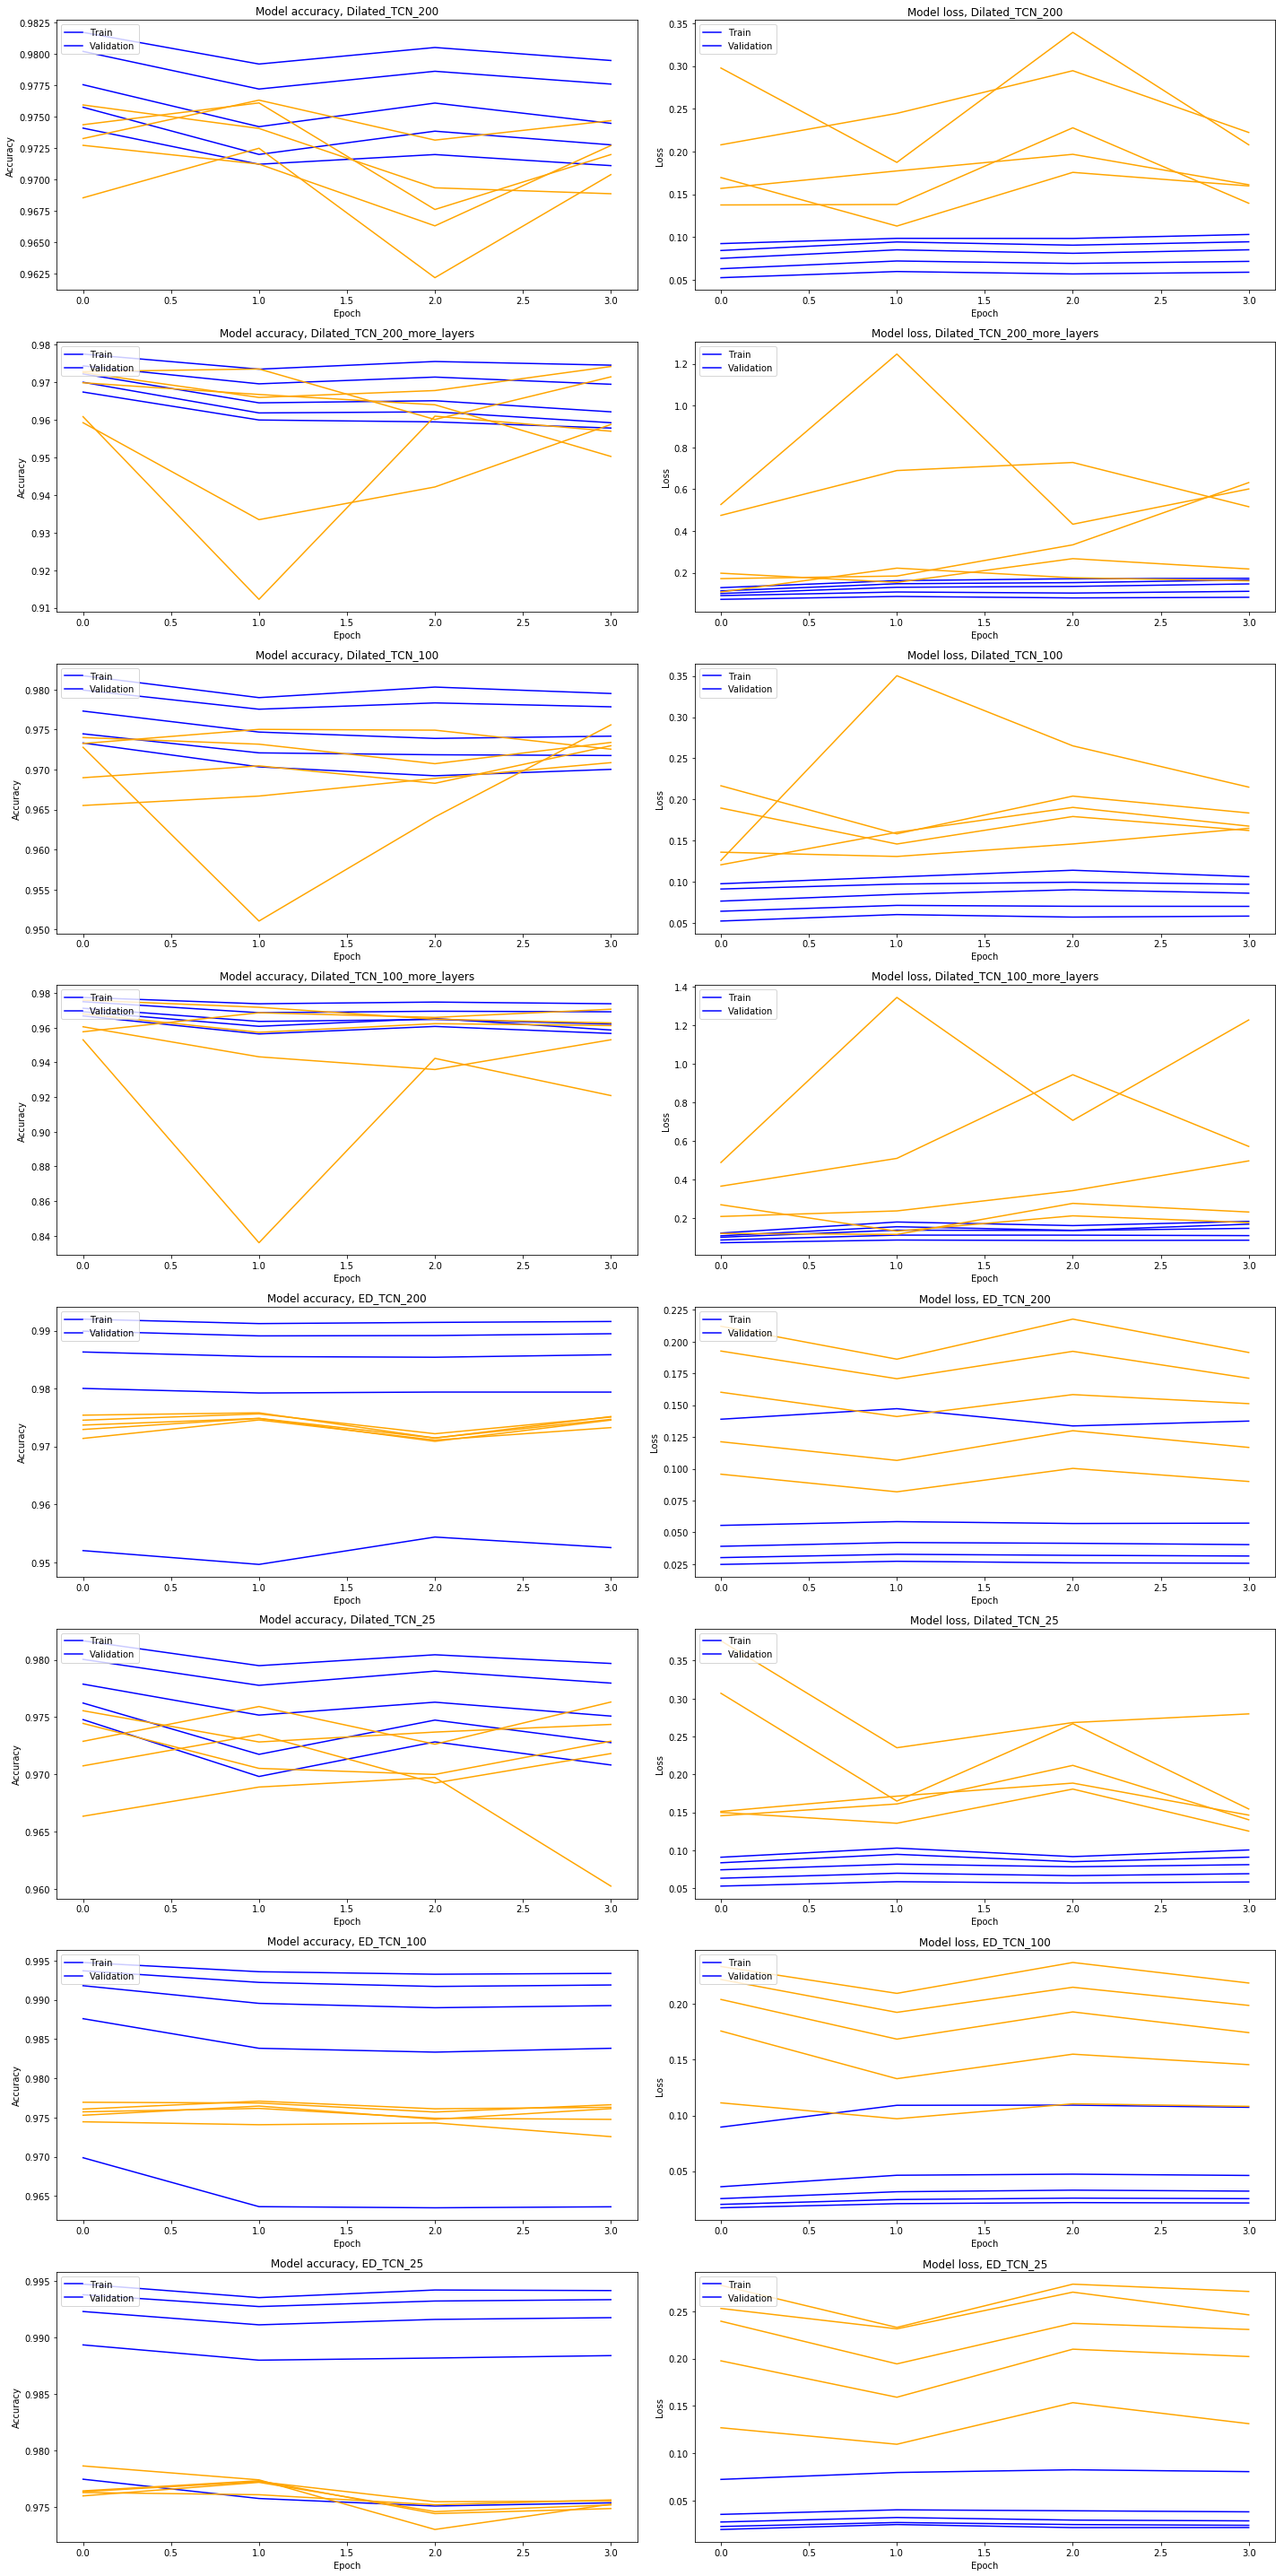

In [117]:
fig, ax = plt.subplots(8, 2)
fig.set_size_inches(20,40)
for ind, (model_name, history) in enumerate(histories.items()):
    # Plot training & validation accuracy values
    ax[ind,0].plot(history[240]['acc'], color='blue')
    ax[ind,0].plot(history[240]['val_acc'], color='orange')
    title = 'Model accuracy, {}'.format(model_name)
    ax[ind,0].set_title(title)
    ax[ind,0].set_ylabel('Accuracy')
    ax[ind,0].set_xlabel('Epoch')
    ax[ind,0].legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    ax[ind,1].plot(history[240]['loss'], color='blue')
    ax[ind,1].plot(history[240]['val_loss'], color='orange')
    title = 'Model loss, {}'.format(model_name)
    ax[ind,1].set_title(title)
    ax[ind,1].set_ylabel('Loss')
    ax[ind,1].set_xlabel('Epoch')
    ax[ind,1].legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()

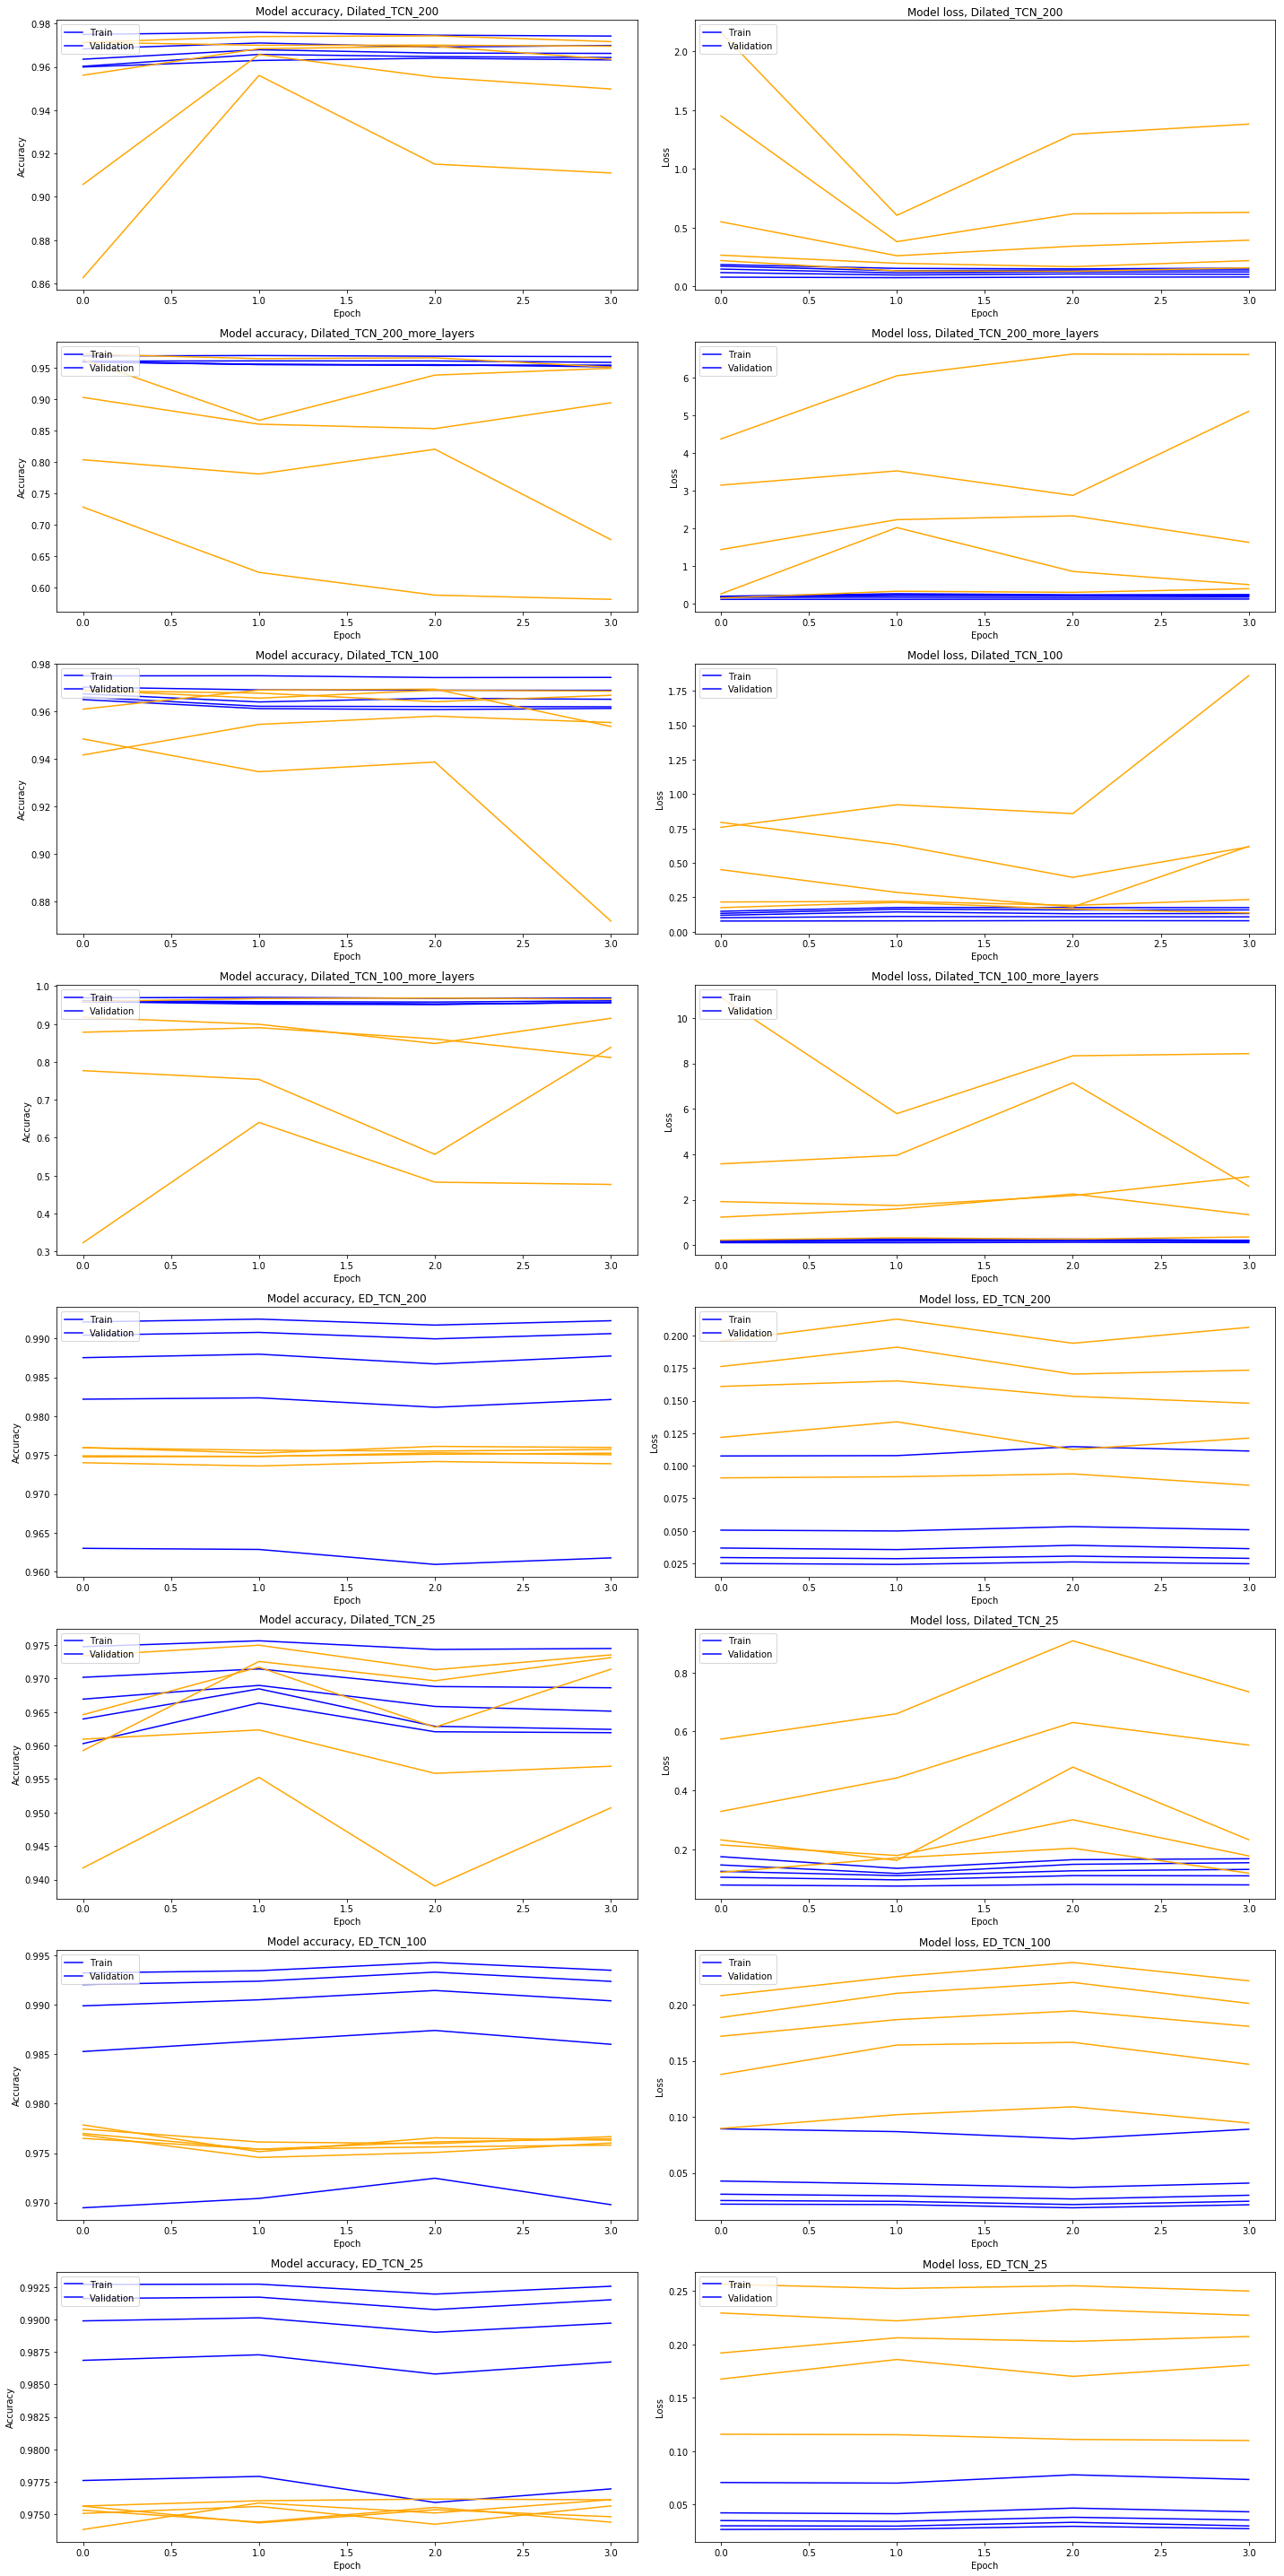

In [118]:
fig, ax = plt.subplots(8, 2)
fig.set_size_inches(20,40)
for ind, (model_name, history) in enumerate(histories.items()):
    # Plot training & validation accuracy values
    ax[ind,0].plot(history[480]['acc'], color='blue')
    ax[ind,0].plot(history[480]['val_acc'], color='orange')
    title = 'Model accuracy, {}'.format(model_name)
    ax[ind,0].set_title(title)
    ax[ind,0].set_ylabel('Accuracy')
    ax[ind,0].set_xlabel('Epoch')
    ax[ind,0].legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    ax[ind,1].plot(history[480]['loss'], color='blue')
    ax[ind,1].plot(history[480]['val_loss'], color='orange')
    title = 'Model loss, {}'.format(model_name)
    ax[ind,1].set_title(title)
    ax[ind,1].set_ylabel('Loss')
    ax[ind,1].set_xlabel('Epoch')
    ax[ind,1].legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()

After staring at histories:  
**for almost all TCN models,  are getting worse after the first epoch**  
None of them show well behaved changes in accuracy / loss across epochs  
The "least worst behaved" seems to be ED_TCN_200.  
In general it seems like we need a "longer" temporal convolution, the shorter ones fail faster  
Not clear what's going on.  
I think I need to look more closely at training within an epoch.  
And also try hyperparameter optimization.  